In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_0

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

In [3]:
from glob import glob
import os
import warnings as w
import requests


In [7]:
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle # to iterate over list and tuple as shown below just for example to understand.

In [9]:
colors = ['red', 'green', 'blue']
color_cycle = cycle(colors)

# Printing out 6 iterations
for _ in range(6):
    print(next(color_cycle))
    # this will generate in loops.

red
green
blue
red
green
blue


## to preprocess the audio files we are using librosa lets start

In [14]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')
# glob is used to handle the directory to get the data in format.

In [15]:
audio_files

['../input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav',
 '../input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-0

In [19]:
# now to play the audio file we use IPD
ipd.Audio(audio_files[9])

In [25]:
y, sr  = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (77988,)
sr: 22050


In [23]:
y # this is the audio time series.

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        3.3473766e-06, -1.9576355e-06,  1.3353035e-06], dtype=float32)

In [24]:
sr ## this is the sampling rate default value is 22050

22050

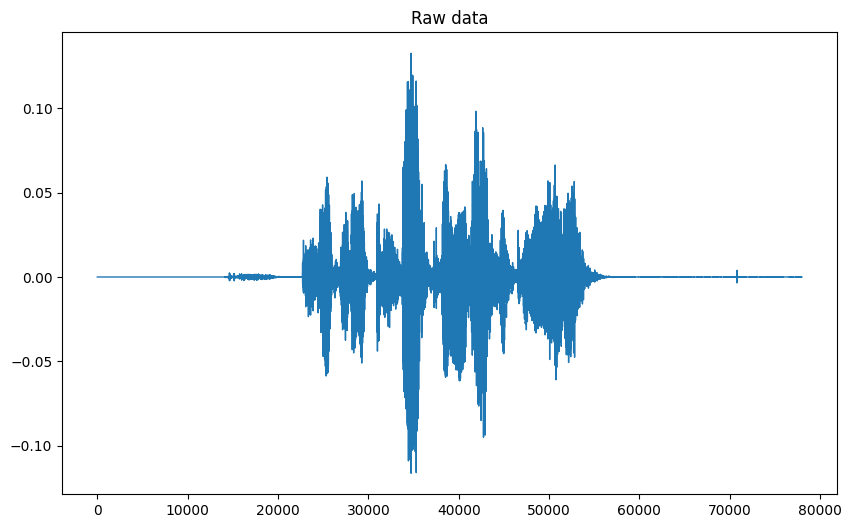

In [31]:
pd.Series(y).plot(figsize = (10,6),lw=1,title='Raw data')
plt.show()

In [32]:
## now clearly seeing the starting and ending part are different so we need to ignore that basically we have to trimmed

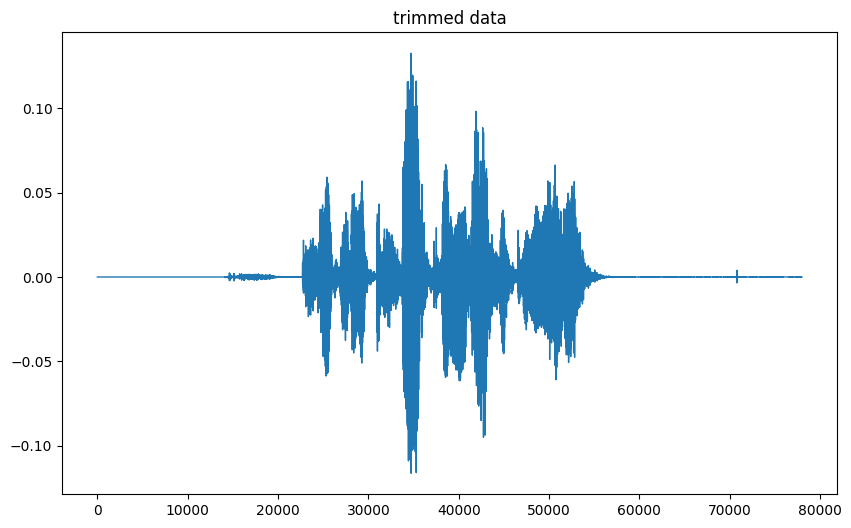

In [38]:
y_trimmed, _  =librosa.effects.trim(y,top_db=200)
pd.Series(y_trimmed).plot(figsize=(10,6),lw=1,title='trimmed data')
plt.show()
## this is how we trimmed the data

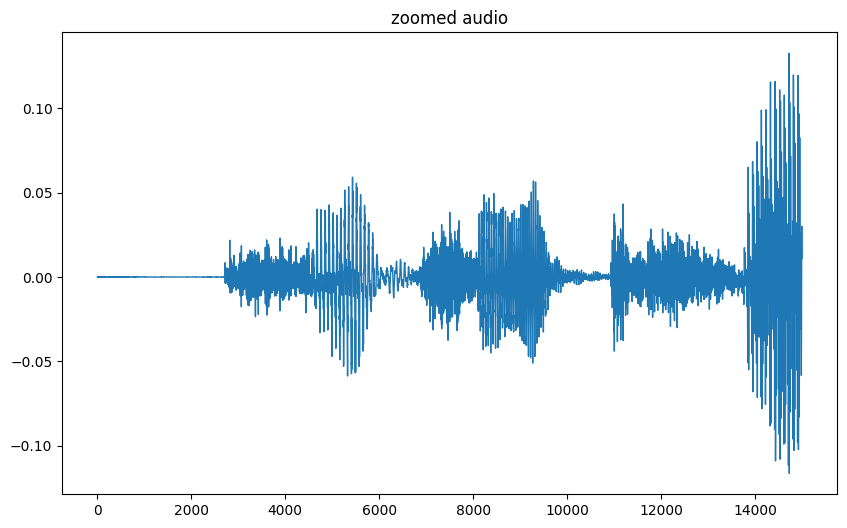

In [44]:
## now lets us see how to zoom it.
pd.Series(y[20000:35000]).plot(lw=1,title='zoomed audio',figsize = (10,6))
plt.show()

## Spectrogram

In [48]:
## which means the frequency is changing over time.
D= librosa.stft(y)
s_db = librosa.amplitude_to_db(np.abs(D),ref = np.max)
s_db.shape

(1025, 153)

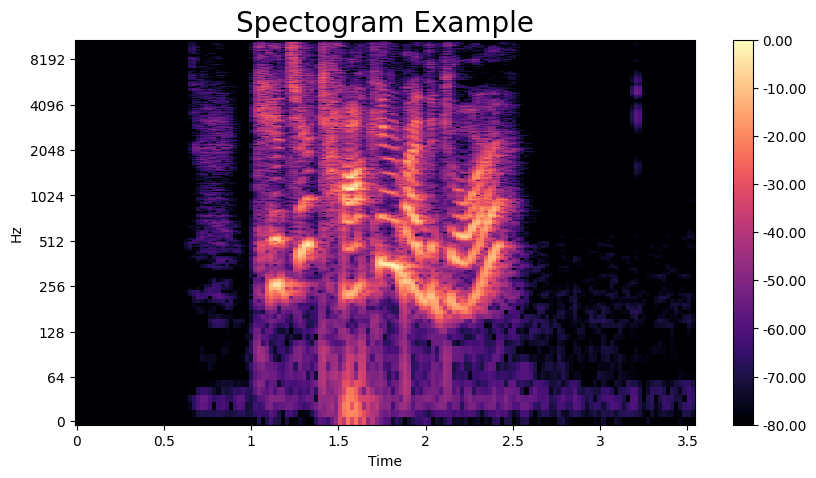

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(s_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Mel Spectrogram

In [51]:
## this is just Melodic sound
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

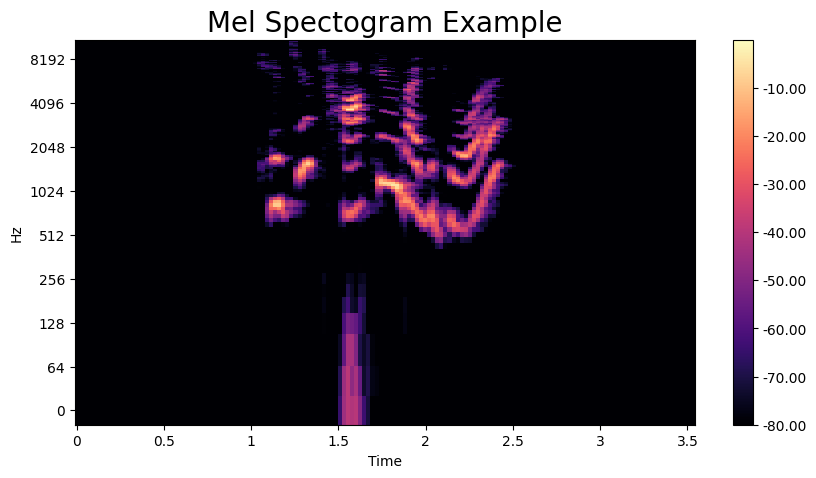

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()